In [ ]:
import pandas as pd

# Load the dataset
file_path = "delhiaqi.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


(None,
                   date       co     no    no2    o3    so2   pm2_5    pm10  \
 0  2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
 1  2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
 2  2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
 3  2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
 4  2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   
 
      nh3  
 0   5.83  
 1   7.66  
 2  11.40  
 3  13.55  
 4  14.19  )

In [ ]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Check for missing values
missing_values = df.isnull().sum()

# Display the updated dataset info and missing values
df.info(), missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    561 non-null    datetime64[ns]
 1   co      561 non-null    float64       
 2   no      561 non-null    float64       
 3   no2     561 non-null    float64       
 4   o3      561 non-null    float64       
 5   so2     561 non-null    float64       
 6   pm2_5   561 non-null    float64       
 7   pm10    561 non-null    float64       
 8   nh3     561 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 39.6 KB


(None,
 date     0
 co       0
 no       0
 no2      0
 o3       0
 so2      0
 pm2_5    0
 pm10     0
 nh3      0
 dtype: int64)

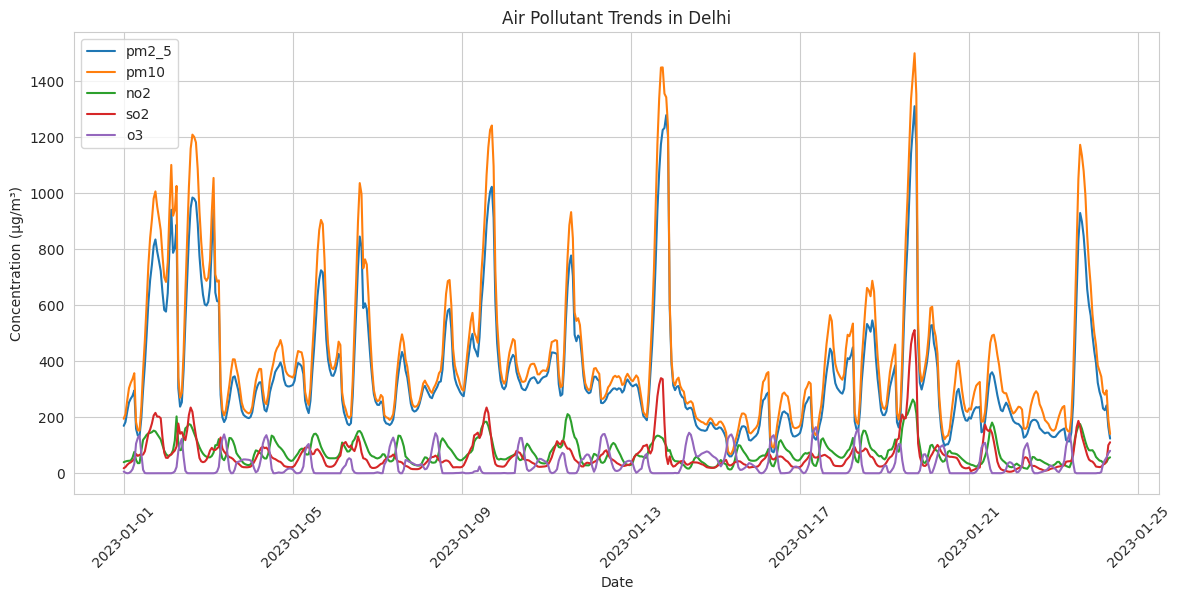

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,561,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,2023-01-12 16:00:00,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062
min,2023-01-01 00:00:00,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000
25%,2023-01-06 20:00:00,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000
50%,2023-01-12 16:00:00,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000
75%,2023-01-18 12:00:00,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000
max,2023-01-24 08:00:00,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000
std,NaN,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for pollutants
summary_stats = df.describe()

# Set plot style
sns.set_style("whitegrid")

# Plot time series of key pollutants
plt.figure(figsize=(14, 6))
for pollutant in ['pm2_5', 'pm10', 'no2', 'so2', 'o3']:
    plt.plot(df['date'], df[pollutant], label=pollutant)

plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.title('Air Pollutant Trends in Delhi')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Display summary statistics
summary_stats


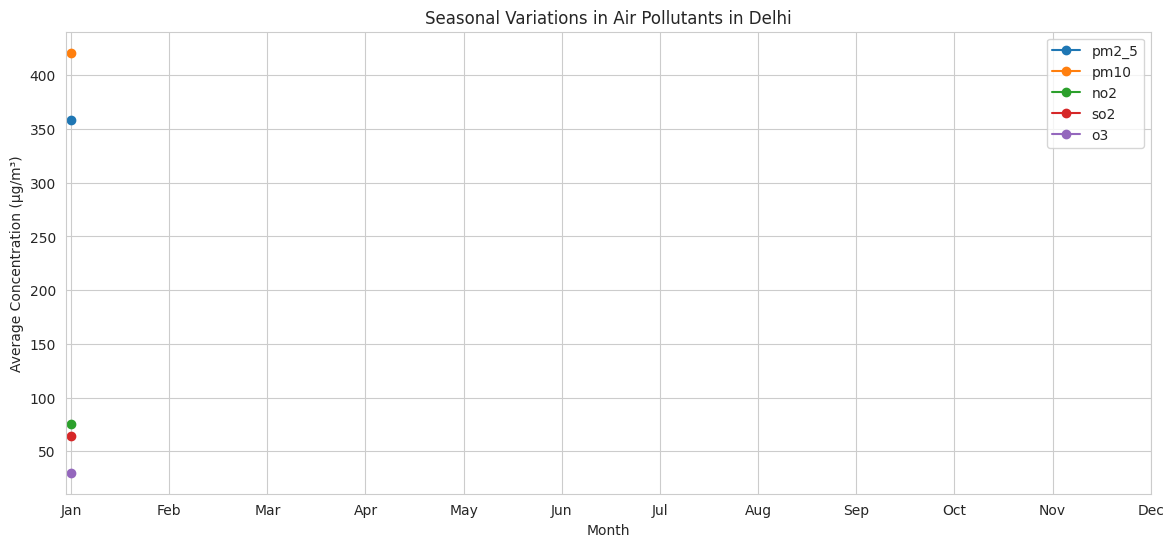

In [ ]:
# Extract month and year for seasonal analysis
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Group by month to find seasonal trends
monthly_avg = df.groupby('month').mean()

# Plot seasonal variations
plt.figure(figsize=(14, 6))
for pollutant in ['pm2_5', 'pm10', 'no2', 'so2', 'o3']:
    plt.plot(monthly_avg.index, monthly_avg[pollutant], marker='o', label=pollutant)

plt.xlabel('Month')
plt.ylabel('Average Concentration (µg/m³)')
plt.title('Seasonal Variations in Air Pollutants in Delhi')
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()



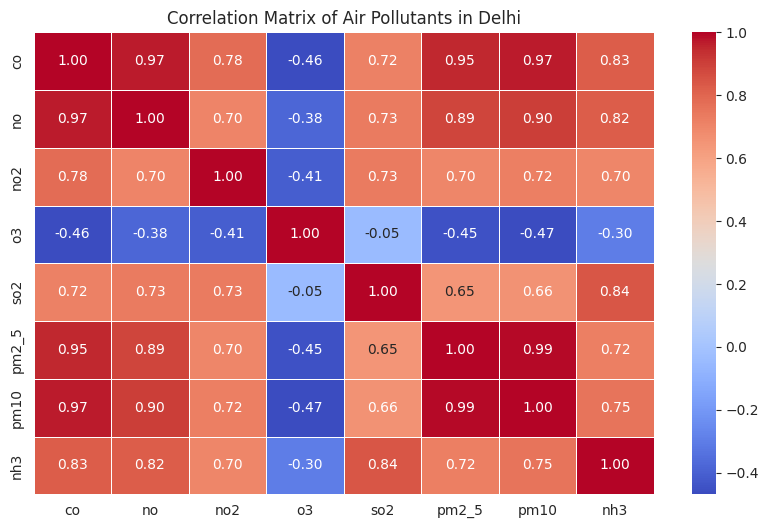

In [ ]:
# Compute correlation matrix
corr_matrix = df.drop(columns=['date', 'month', 'year']).corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Air Pollutants in Delhi')
plt.show()


Summary Statistics:
                       date            co          no         no2          o3  \
count                  561    561.000000  561.000000  561.000000  561.000000   
mean   2023-01-12 16:00:00   3814.942210   51.181979   75.292496   30.141943   
min    2023-01-01 00:00:00    654.220000    0.000000   13.370000    0.000000   
25%    2023-01-06 20:00:00   1708.980000    3.380000   44.550000    0.070000   
50%    2023-01-12 16:00:00   2590.180000   13.300000   63.750000   11.800000   
75%    2023-01-18 12:00:00   4432.680000   59.010000   97.330000   47.210000   
max    2023-01-24 08:00:00  16876.220000  425.580000  263.210000  164.510000   
std                    NaN   3227.744681   83.904476   42.473791   39.979405   

              so2        pm2_5         pm10         nh3  month    year  
count  561.000000   561.000000   561.000000  561.000000  561.0   561.0  
mean    64.655936   358.256364   420.988414   26.425062    1.0  2023.0  
min      5.250000    60.100000    69.08

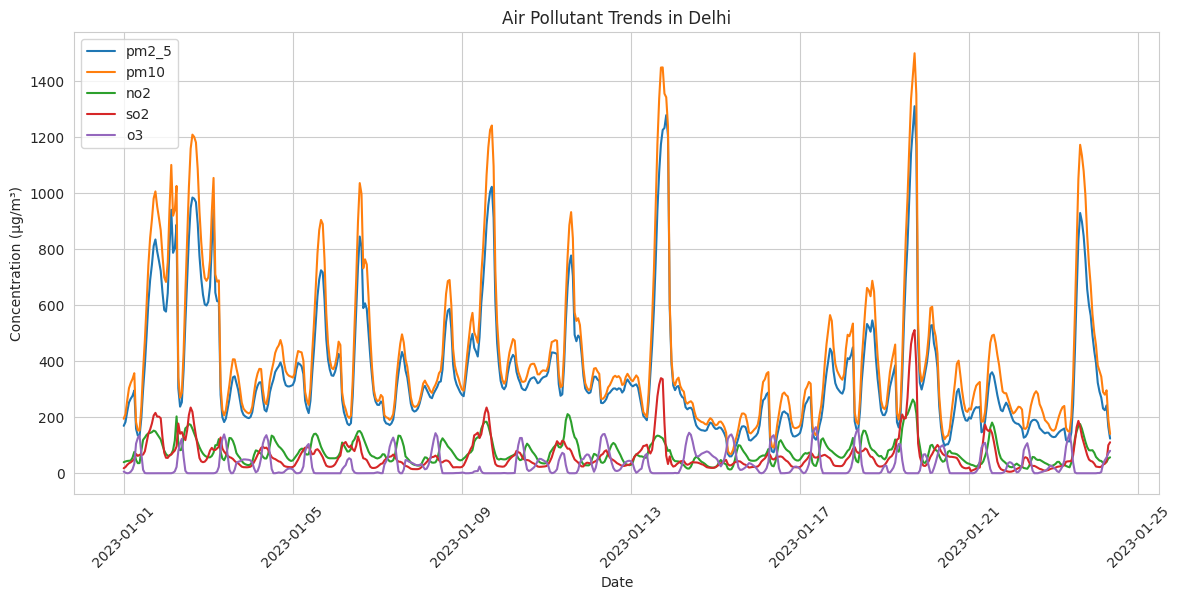

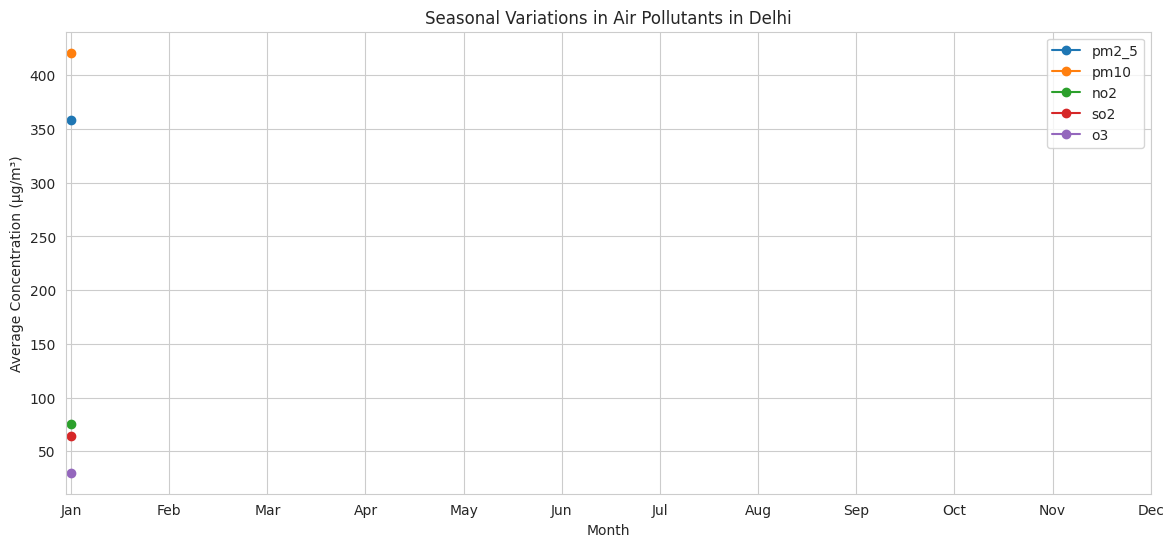

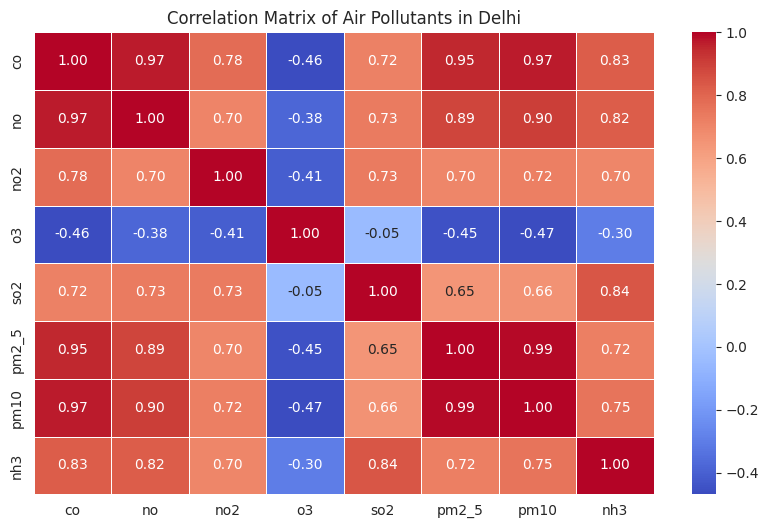

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
file_path = "delhiaqi.csv"
df = pd.read_csv(file_path)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract month and year for seasonal analysis
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Summary Statistics
print("Summary Statistics:\n", df.describe())

# Time-Series Plot of Pollutants
plt.figure(figsize=(14, 6))
for pollutant in ['pm2_5', 'pm10', 'no2', 'so2', 'o3']:
    plt.plot(df['date'], df[pollutant], label=pollutant)
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.title('Air Pollutant Trends in Delhi')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Seasonal Analysis: Monthly Trends
monthly_avg = df.groupby('month').mean()
plt.figure(figsize=(14, 6))
for pollutant in ['pm2_5', 'pm10', 'no2', 'so2', 'o3']:
    plt.plot(monthly_avg.index, monthly_avg[pollutant], marker='o', label=pollutant)
plt.xlabel('Month')
plt.ylabel('Average Concentration (µg/m³)')
plt.title('Seasonal Variations in Air Pollutants in Delhi')
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Correlation Matrix
corr_matrix = df.drop(columns=['date', 'month', 'year']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Air Pollutants in Delhi')
plt.show()


In [ ]:
data = [10, 20, 30, 40]
series = pd.Series(data, index=['a', 'b', 'c', 'd'])
print(series)



a    10
b    20
c    30
d    40
dtype: int64


In [ ]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Salary': [50000, 60000, 70000]
}
df = pd.DataFrame(data)
print(df)


      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   35   70000


In [ ]:
df = pd.read_csv('delhiaqi.csv')
print(df.head(10))  # Display first 5 rows


                  date       co     no    no2      o3    so2   pm2_5    pm10  \
0  2023-01-01 00:00:00  1655.58   1.66  39.41    5.90  17.88  169.29  194.64   
1  2023-01-01 01:00:00  1869.20   6.82  42.16    1.99  22.17  182.84  211.08   
2  2023-01-01 02:00:00  2510.07  27.72  43.87    0.02  30.04  220.25  260.68   
3  2023-01-01 03:00:00  3150.94  55.43  44.55    0.85  35.76  252.90  304.12   
4  2023-01-01 04:00:00  3471.37  68.84  45.24    5.45  39.10  266.36  322.80   
5  2023-01-01 05:00:00  3578.19  64.37  55.52   14.13  44.35  276.54  336.79   
6  2023-01-01 06:00:00  3578.19  46.94  76.09   33.26  50.54  295.40  357.07   
7  2023-01-01 07:00:00  1468.66   9.83  47.30  105.86  68.66  158.83  182.61   
8  2023-01-01 08:00:00  1161.58   5.81  35.99  125.89  61.99  134.39  153.47   
9  2023-01-01 09:00:00  1161.58   4.58  36.33  134.47  65.80  133.22  152.09   

     nh3  
0   5.83  
1   7.66  
2  11.40  
3  13.55  
4  14.19  
5  16.21  
6  19.25  
7   7.09  
8   5.51  
9   6.02 

In [ ]:
df.to_excel('output.xlsx', index=False)


In [ ]:
print(df.info())     # Overview of dataset
print(df.describe()) # Summary statistics
print(df.columns)    # List of column names
print(df.shape)      # Number of rows and columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB
None
                 co          no         no2          o3         so2  \
count    561.000000  561.000000  561.000000  561.000000  561.000000   
mean    3814.942210   51.181979   75.292496   30.141943   64.655936   
std     3227.744681   83.904476   42.473791   39.979405   61.073080   
min      654.220000    0.000000   13.370000    0.000000    5.250000   
25%     1708.980000    3.380000   44.550000    0.070000   28.130000   
50%  

In [ ]:
df.to_csv('output1.csv', index=False)

In [ ]:
print(df['co'])           # Select a single column
print(df[['no', 'no2']]) # Select multiple columns


0      1655.58
1      1869.20
2      2510.07
3      3150.94
4      3471.37
        ...   
556    1762.39
557    1735.69
558    1922.61
559    1361.85
560    1134.87
Name: co, Length: 561, dtype: float64
        no    no2
0     1.66  39.41
1     6.82  42.16
2    27.72  43.87
3    55.43  44.55
4    68.84  45.24
..     ...    ...
556   4.64  37.01
557   6.82  34.96
558   8.16  40.10
559   9.05  52.78
560   8.61  56.89

[561 rows x 2 columns]


In [ ]:
high_salary = df[df['no'] > 55]
print(high_salary)


                    date        co      no     no2     o3     so2   pm2_5  \
3    2023-01-01 03:00:00   3150.94   55.43   44.55   0.85   35.76  252.90   
4    2023-01-01 04:00:00   3471.37   68.84   45.24   5.45   39.10  266.36   
5    2023-01-01 05:00:00   3578.19   64.37   55.52  14.13   44.35  276.54   
12   2023-01-01 12:00:00   6141.66  123.38  127.49   0.72   78.20  385.41   
13   2023-01-01 13:00:00   8010.86  189.54  137.09   0.00  109.67  493.18   
..                   ...       ...     ...     ...    ...     ...     ...   
545  2023-01-23 17:00:00  10147.09  187.76  135.72   0.00  109.67  846.32   
546  2023-01-23 18:00:00   8544.92  153.78  112.41   0.00   87.74  762.53   
547  2023-01-23 19:00:00   7049.56  126.96   93.22   0.00   64.85  657.49   
548  2023-01-23 20:00:00   6301.88  109.97   82.25   0.00   49.11  600.46   
549  2023-01-23 21:00:00   5607.61   85.83   81.57   0.00   43.87  562.30   

        pm10    nh3  
3     304.12  13.55  
4     322.80  14.19  
5     336

In [ ]:
sorted_df = df.sort_values(by='no', ascending=True)
print(sorted_df)


                    date        co      no     no2     o3     so2    pm2_5  \
287  2023-01-12 23:00:00   1375.20    0.00   28.79  44.70   30.28   325.23   
334  2023-01-14 22:00:00   1188.28    0.00   20.22  63.66   19.07   177.13   
333  2023-01-14 21:00:00   1188.28    0.00   21.25  70.10   19.55   181.00   
332  2023-01-14 20:00:00   1161.58    0.00   23.31  75.82   20.27   169.64   
331  2023-01-14 19:00:00   1188.28    0.00   27.42  77.96   21.70   154.16   
..                   ...       ...     ...     ...    ...     ...      ...   
304  2023-01-13 16:00:00  16235.35  389.81  132.98   0.00  316.62  1074.91   
303  2023-01-13 15:00:00  14953.61  389.81  134.35   0.00  274.66   938.28   
446  2023-01-19 14:00:00  15167.24  404.12  227.57   0.00  381.47   980.86   
448  2023-01-19 16:00:00  16448.97  411.27  263.21   0.00  495.91  1228.04   
447  2023-01-19 15:00:00  16448.97  425.58  246.76   0.00  461.58  1142.61   

        pm10     nh3  
287   344.31    2.63  
334   191.22    3